In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df_UA = df[df['job_country'] == 'Ukraine' ].copy()
df_UA['job_posted_month'] = df_UA['job_posted_date'].dt.strftime('%B')
df_UA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
275,Data Engineer,Інженер з договірної роботи,"Dnipro, Dnipropetrovsk Oblast, Ukraine",via RABOTA.ua,Full-time,False,Ukraine,2023-01-24 13:51:43,True,False,Ukraine,None,NaN,NaN,Vodafone Україна,None,None,January
524,Data Analyst,Data analyst,"Kyiv, Ukraine",via Robota.ua,Full-time,False,Ukraine,2023-07-11 13:47:33,True,False,Ukraine,None,NaN,NaN,"Fozzy Group, Логістика",None,None,July
655,Data Engineer,Middle Data Engineer (Communication Management...,"Chernivtsi, Chernivtsi Oblast, Ukraine",via Rabota.ua,Full-time,False,Ukraine,2023-06-02 13:43:32,True,False,Ukraine,None,NaN,NaN,Sigma Software,None,None,June
855,Data Scientist,Data Scientist (Machine Learning),"Kyiv, Ukraine",via Robota.ua,Full-time,False,Ukraine,2023-09-15 13:47:48,False,False,Ukraine,None,NaN,NaN,"ФОРА, ООО",None,None,September
914,Senior Data Scientist,Senior Certification Manager - Data Science,Anywhere,via Levels.fyi,Contractor,True,Ukraine,2023-11-22 13:55:12,False,False,Ukraine,None,NaN,NaN,DataCamp,"['r', 'python', 'sql']","{'programming': ['r', 'python', 'sql']}",November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780162,Software Engineer,Python Developer,"Kyiv, Ukraine",via Startup Jobs,Full-time,False,Ukraine,2023-08-04 05:16:45,True,False,Ukraine,None,NaN,NaN,Neo Cybernetica,"['python', 'rust', 'javascript', 'typescript',...","{'analyst_tools': ['datarobot'], 'libraries': ...",August
780577,Software Engineer,Senior Software Engineer,"Lviv, Lviv Oblast, Ukraine",via BeBee Україна,Full-time,False,Ukraine,2023-09-01 05:56:00,True,False,Ukraine,None,NaN,NaN,Hitachi Careers,"['shell', 'bash', 'linux']","{'os': ['linux'], 'programming': ['shell', 'ba...",September
780594,Software Engineer,Software Engineer,"Kyiv, Ukraine",via BeBee Україна,Full-time,False,Ukraine,2023-09-03 06:03:49,False,False,Ukraine,None,NaN,NaN,Hitachi Careers,"['c', 'linux']","{'os': ['linux'], 'programming': ['c']}",September
781080,Data Analyst,Team Lead Supply Chain Data Analyst,"Odesa, Odesa Oblast, Ukraine",via LinkedIn,Full-time,False,Ukraine,2023-09-25 06:17:44,False,False,Ukraine,None,NaN,NaN,AUTODOC,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",September


In [10]:
df_UA.pivot_table(index='job_posted_month', columns = 'job_title_short', aggfunc='size')



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,20.0,6.0,26.0,28.0,8.0,5.0,3.0,7.0,NaN,16.0
August,8.0,3.0,39.0,26.0,17.0,11.0,3.0,15.0,2.0,37.0
December,14.0,2.0,44.0,28.0,18.0,2.0,2.0,15.0,6.0,19.0
February,18.0,4.0,42.0,40.0,26.0,11.0,3.0,12.0,4.0,22.0
January,32.0,3.0,46.0,65.0,39.0,10.0,8.0,15.0,4.0,42.0
July,11.0,3.0,31.0,21.0,15.0,5.0,3.0,9.0,2.0,14.0
June,19.0,6.0,49.0,28.0,26.0,7.0,4.0,17.0,1.0,16.0
March,18.0,3.0,42.0,33.0,15.0,6.0,4.0,7.0,7.0,11.0
May,18.0,4.0,42.0,27.0,16.0,7.0,3.0,7.0,2.0,14.0


In [22]:
df_UA_pivot = df_UA.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')
df_UA_pivot.reset_index(inplace=True)
df_UA_pivot['month_no'] = pd.to_datetime(df_UA_pivot['job_posted_month'], format='%B', errors='coerce').dt.month
df_UA_pivot.sort_values('month_no', inplace=True)
df_UA_pivot.set_index('job_posted_month', inplace=True)
df_UA_pivot.drop(columns='month_no', inplace=True)
df_UA_pivot




job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,32.0,3.0,46.0,65.0,39.0,10.0,8.0,15.0,4.0,42.0
February,18.0,4.0,42.0,40.0,26.0,11.0,3.0,12.0,4.0,22.0
March,18.0,3.0,42.0,33.0,15.0,6.0,4.0,7.0,7.0,11.0
April,20.0,6.0,26.0,28.0,8.0,5.0,3.0,7.0,NaN,16.0
May,18.0,4.0,42.0,27.0,16.0,7.0,3.0,7.0,2.0,14.0
June,19.0,6.0,49.0,28.0,26.0,7.0,4.0,17.0,1.0,16.0
July,11.0,3.0,31.0,21.0,15.0,5.0,3.0,9.0,2.0,14.0
August,8.0,3.0,39.0,26.0,17.0,11.0,3.0,15.0,2.0,37.0
September,10.0,6.0,33.0,26.0,21.0,7.0,2.0,10.0,4.0,23.0


In [41]:
top_3 = df_UA['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3



['Data Analyst', 'Data Engineer', 'Software Engineer']

Text(0.5, 1.0, 'Monthly Job Postings for Top Data Jobs in Ukraine')

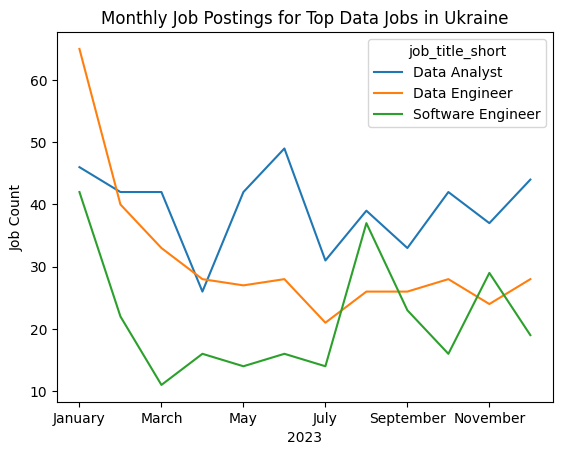

In [42]:
df_UA_pivot[top_3].plot(kind='line')
plt.ylabel('Job Count') 
plt.xlabel('2023')
plt.title('Monthly Job Postings for Top Data Jobs in Ukraine')

Index(['Business Analyst', 'Cloud Engineer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Machine Learning Engineer', 'Senior Data Analyst',
       'Senior Data Engineer', 'Senior Data Scientist', 'Software Engineer'],
      dtype='object', name='job_title_short')
